# BUSINESS PROBLEM

# Analysis Fraud Company

Check Financial fraud transations.

# What is the business model?

Analysis Fraud Company is a company specialized in the detection of fraud in financial transactions made through mobile devices. The company has a service called "Blocker Fraud" which guarantees the blocking of fraudulent transactions.

# What is the business problem the company is facing?

Analysis Fraud Company is expanding and try to reach new customers as soon as possible, it has adopted a very aggressive strategy. The strategy works as follows:

The company will receive 25% of each transaction value that was correctly detected as fraud.

The company will receive 5% of each transaction value that was detected as a fraud despite being legitimate.

The company will return 100% of each transaction value that was detected as legitimate despite being a fraud.

In other words, the company takes the risk of failing to detect fraud and earns money when correctly detecting fraud.

For the client, it is an excellent deal to hire Blocker Fraud Company. Although the fee charged is very high when fraud is correctly detected (25%), the hiring company reduces its costs of detecting fraudulent transactions and errors in the anti-fraud service are under the hired company responsibility.

For the Analysis of Fraud company, it will attract many customers with the guaranteed return in the event of a failure to detect customer fraud. Besides, Analysis of Fraud only depends on the precision and accuracy of its model: the more accurate the prediction, the higher the company's revenue. However, in the case of low accuracy, the company could have a high loss.

# PROBLEM UNDERSTANDING

What is the business solution that this project has to deliver? As a data science consultant, you have to create a highly precise and accurate model for detecting fraud in mobile transactions.

At the end of your consultancy, you need to provide the CEO of Analysis Fraud Company a model in production that will be accessed via API, meaning that clients will send their transactions via API for your model to classify as fraudulent or legitimate.

In addition, you will need to submit a report with the model's performance and results about the profit and loss that the company will make using the model you created. Your report should contain the answers to the following questions:

   * What is the precision and accuracy of the model?
   
   * What is the expected revenue for the cases where the model succeed in detecting fraud?
   
   * What is the expected loss by the company for the cases where the model fails to detect fraud?
   
   * What is the expected profit for the Analysis Fraud Company if it uses the model for all mobile transactions?


## IOT Method Solution Strategy

In [11]:
cd images

/home/ehgeraldo/repos/Fraud_Detection/images


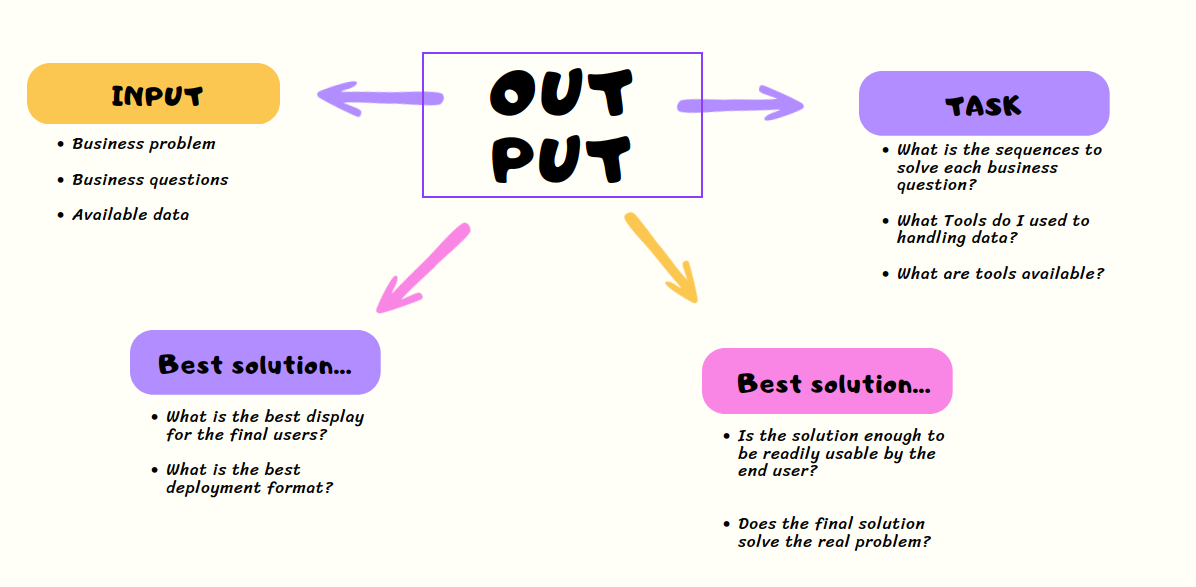

In [12]:
from IPython.display       import Image
Image( 'IOT_Method_Solution.png', width=1000 )

# SOLUTION STRATEGY


### INPUT

   * Business problem: correctly detect fraudulent transactions.
   * Business questions: described in the preceding section
   * Available data: dataset with information from mobile transactions.
        
        
### OUTPUT

   * An API to classify clients transactions.
   * A dashboard with reporting information about the following business questions:

   * What is the precision and accuracy of the model?
   * What is the expected revenue for the cases where the model succeed in detecting fraud?
   * What is the expected loss by the company for the cases where the model fails to detect fraud
   * What is the expected profit for the Blocker Fraud Company if it uses the model for all mobile transactions?
    

### TASKs
Create an API to classify clients transactions.

   * Create a machine learning classification model
   * Create an API to respond to clients requests
   * Host API on a cloud service

# PROJECT SOLUTION CYCLE

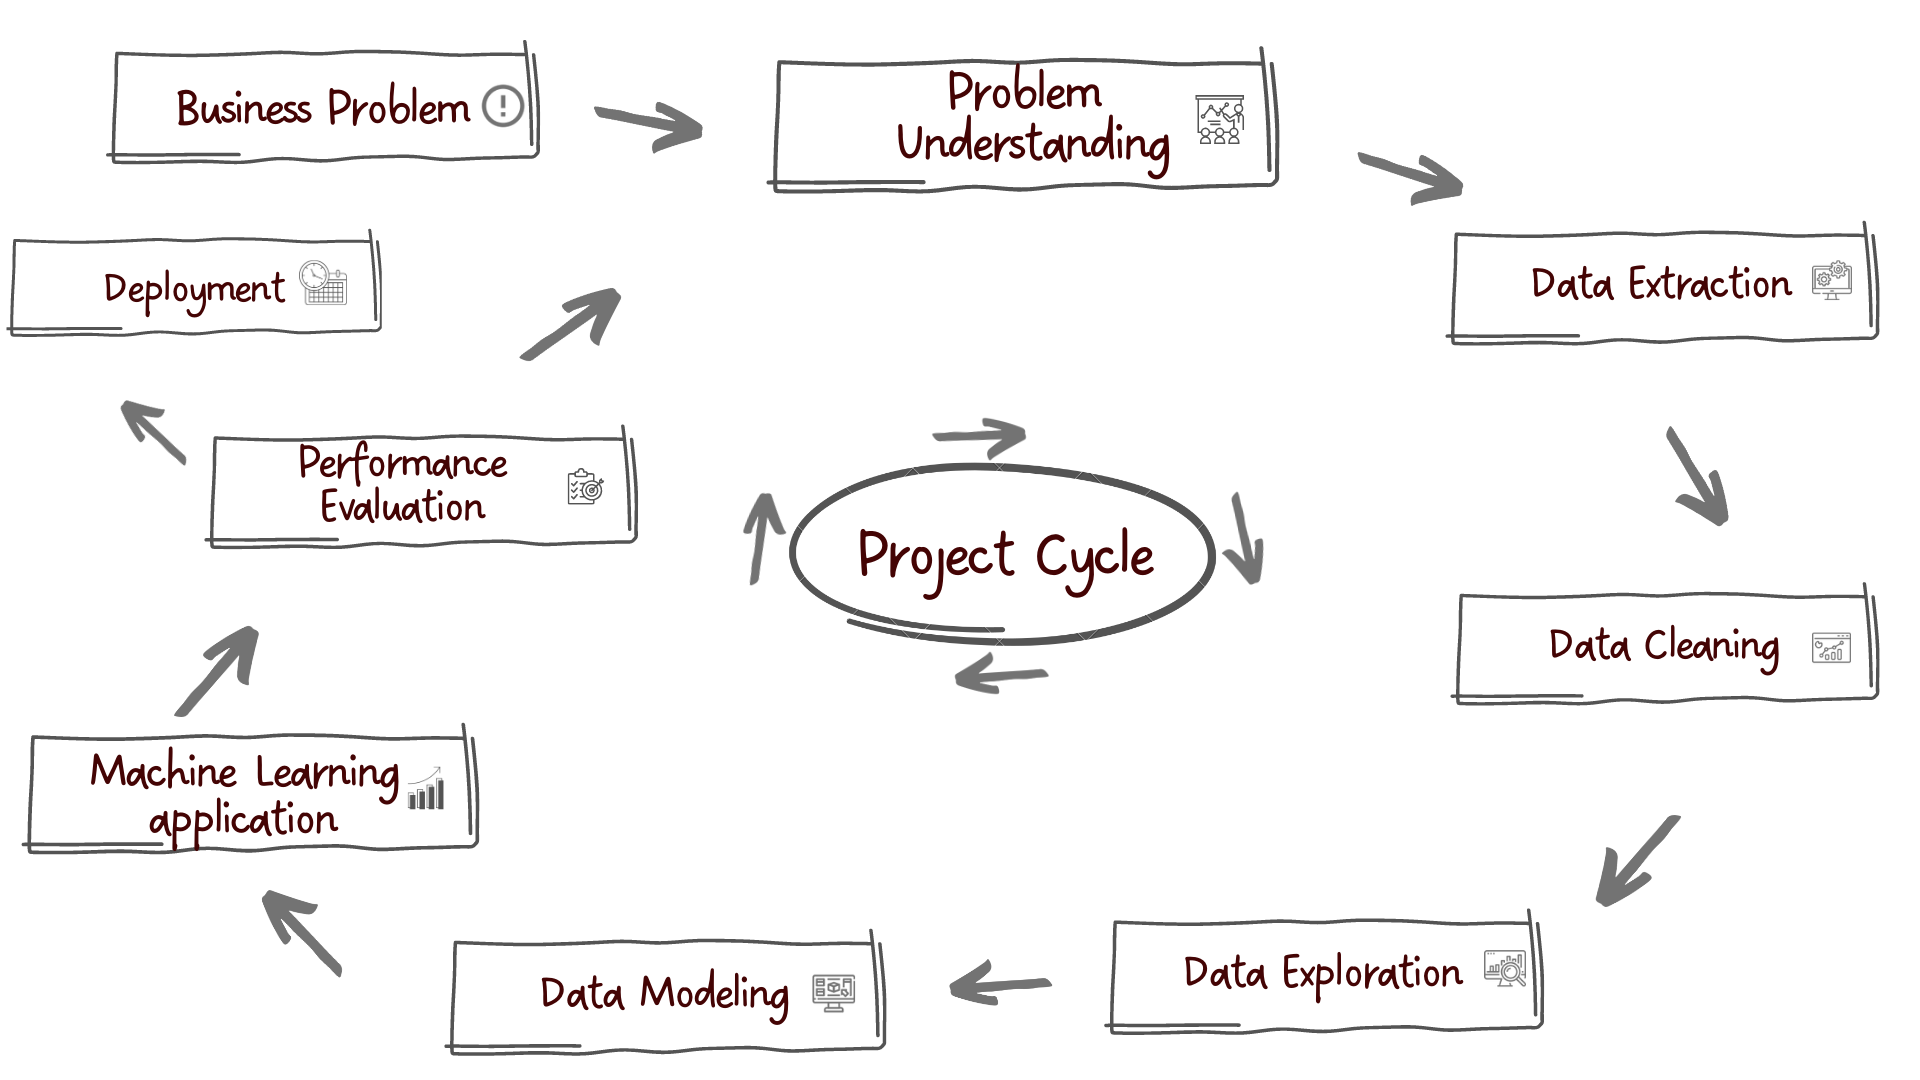

In [15]:
Image( 'Project_Cicles.png', width=1000 )

# 0.0 Imports

In [17]:
import pandas as pd
import inflection

# Helper Function

In [20]:
def check_dataframe( dataframe, sample_size = 3 ):
    '''
    Print number of NAs, percentage of NA to the given column,
    number of unique values, data types, dataframe shape and 
    return a random sample of dataframe'''
    
    # create dictionary with descriptive information
    dict_data = {'Num NAs':     dataframe.isna().sum(),
                 'Percent NAs': dataframe.isna().mean(),
                 'Num unique':  dataframe.nunique(),
                 'Data Type':   dataframe.dtypes }
  
    # print descriptive data
    print( pd.DataFrame( dict_data ), '\n' )
    # print dataframe shape
    print( f'Dataframe shape is {dataframe.shape}', '\n' )  
    
    
    return dataframe.sample( sample_size )


# Loading Data

In [6]:
pwd

'/home/ehgeraldo/repos/Fraud_Detection'

In [8]:
cd Fraud_Detection

/home/ehgeraldo/repos/Fraud_Detection


In [10]:
df_raw = pd.read_csv('/home/ehgeraldo/repos/Fraud_Detection/data/synth_composite.csv', low_memory=False)

In [11]:
df_raw.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0


# Data Description

In [13]:
df1 = df_raw.copy()

# Data dimensions

In [14]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Columns: {}'.format(df1.shape[1]))

Number of Rows: 6362620
Number of Columns: 11


# Rename Columns

In [15]:
df1.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
cols_old = ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig','nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud','isFlaggedFraud']

snakecase = lambda x: inflection.underscore(x)

cols_news = list(map(snakecase, cols_old))

df1.columns = cols_news

In [19]:
df1.head()

,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0
4,235,PAYMENT,7866.992466,160_5544127_0,74632.326454,66765.333988,160_2370260_0,5.390545e+00,9.820910e+00,0,0


# Data types

In [21]:
check_dataframe( df1 )

                  Num NAs  Percent NAs  Num unique Data Type
step                    0          0.0         743     int64
type                    0          0.0           5    object
amount                  0          0.0     6362038   float64
name_orig               0          0.0     6353335    object
oldbalance_org          0          0.0     6362547   float64
newbalance_orig         0          0.0     2275917   float64
name_dest               0          0.0     2727854    object
oldbalance_dest         0          0.0     6362620   float64
newbalance_dest         0          0.0     6362620   float64
is_fraud                0          0.0           2     int64
is_flagged_fraud        0          0.0           2     int64 

Dataframe shape is (6362620, 11) 



,step,type,amount,name_orig,oldbalance_org,newbalance_orig,name_dest,oldbalance_dest,newbalance_dest,is_fraud,is_flagged_fraud
5641417,253,CASH_OUT,177246.871843,160_3330085_0,1.216842e+00,0.000000e+00,160_656014_0,2.329367e+06,2.506765e+06,0,0
53631,564,CASH_IN,145028.773895,160_6157663_0,7.540340e+06,7.395311e+06,160_1778904_0,1.577659e+06,1.432449e+06,0,0
829739,408,CASH_IN,55834.631164,160_5971753_0,1.073185e+07,1.067602e+07,160_393230_0,3.454325e+05,2.897613e+05,0,0
